In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [109]:
death = pd.read_csv("death_7_age_groups_1974-2018.csv") 
people = pd.read_csv("population_7_age_groups_1982-2018.csv")
birth = pd.read_csv("Crude_birth_rate_1938-2018.csv")

In [110]:
year = ['1982', '1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [111]:
birth_data = birth['UK']                                 # extract UK birth rate
birthrate = np.array(birth_data[0:37], dtype=np.float)   #extract birth rate data from year 2018 to 1982
birthr = np.zeros(birthrate.shape[0])                    # birth rate from 1982-2018
for i in range(birthrate.shape[0]):
       birthr[i] = birthrate[birthrate.shape[0]-i-1] 

In [112]:
total_popu = people.iloc[-1, :]

In [113]:
dr = {'Age': ['0', '1-4', '5-9', '10-14','15-19', '20-29','30+','total']}

In [114]:
for i in range(len(year)):
    k = year[i]
    new_dr = death[k][0:]/total_popu[k]
    dr.update({k : new_dr})

In [115]:
column = ['Age'] + year
df = pd.DataFrame(dr, columns= column)

In [116]:
df.to_csv (r'To_plot_birth_death.csv', index = False, header=True)

In [117]:
year1 = np.arange(1982, 2019)

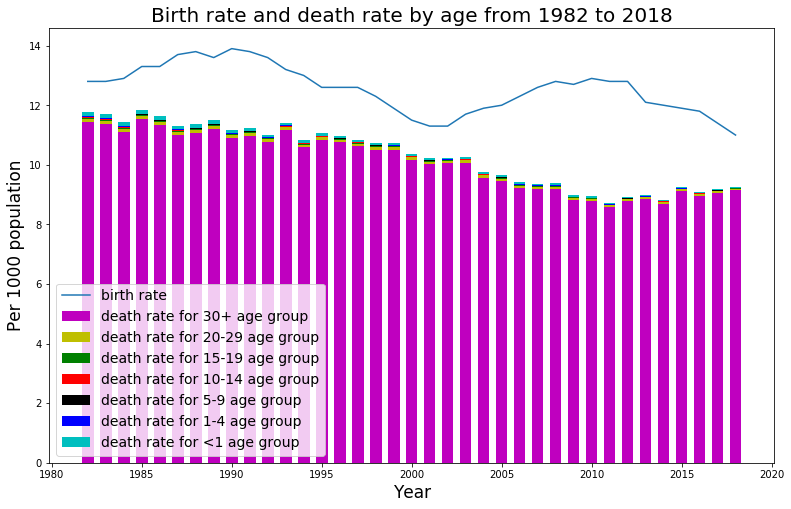

In [118]:
plt.figure(figsize=(13,8))
d6 = nd.iloc[6,1:]*1000
plt.bar(year1,d6, bottom = 0, width = 0.65, color = 'm',  label = 'death rate for 30+ age group')
d5 = nd.iloc[5,1:]*1000
plt.bar(year1, d5, bottom = d6, width = 0.65,color = 'y', label = 'death rate for 20-29 age group')
d4 = nd.iloc[4,1:]*1000
bars1 = np.add(d6, d5).tolist()
plt.bar(year1, d4, bottom = bars1, width = 0.65, color = 'g', label = 'death rate for 15-19 age group')
d3 = nd.iloc[3,1:]*1000
bars2 = np.add(bars1, d4).tolist()
plt.bar(year1,d3, bottom = bars2, width = 0.65, color = 'r', label = 'death rate for 10-14 age group')
d2 = nd.iloc[2,1:]*1000
bars3 = np.add(bars2, d3).tolist()
plt.bar(year1, d2, bottom = bars3, width = 0.65,color = 'k',  label = 'death rate for 5-9 age group')
d1 = nd.iloc[1,1:]*1000
bars4 = np.add(bars3, d2).tolist()
plt.bar(year1, d1, bottom = bars4, width = 0.65, color = 'b', label = 'death rate for 1-4 age group')
d0 = nd.iloc[0,1:]*1000
bars5 = np.add(bars4, d1).tolist()
plt.bar(year1, d0, bottom = bars5, width = 0.65, color = 'c', label = 'death rate for <1 age group')
birthr1 = birthr
plt.plot(year1, birthr1, label = 'birth rate')
plt.title('Birth rate and death rate by age from 1982 to 2018', fontsize = 20)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Per 1000 population', fontsize = 17)
plt.legend(prop = {"size": 14});
plt.savefig('birth and death.png')